In [5]:
%load_ext autoreload
%autoreload 2

from propose.utils.rat7m.loaders import load_cameras, load_mocap
from pathlib import Path

import imageio

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
home = str(Path.home())
path = f'{home}/data/rat7m/mocap-s4-d1.mat'

cameras = load_cameras(path)
mocap = load_mocap(path)

_CHUNKS = 3500

vid_filename = f'{home}/data/rat7m/s4-d1/s4-d1-camera4-0.mp4'
vid = imageio.get_reader(vid_filename)

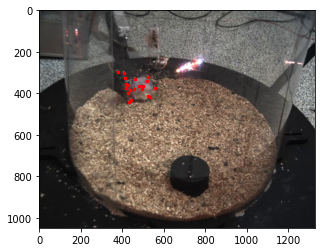

In [19]:
sID = 800

camera = cameras['Camera4']
fID = camera.frame.squeeze()[sID]

vidID = fID // _CHUNKS * _CHUNKS
vidIDf = fID % _CHUNKS

im = vid.get_data(vidIDf)

pts = mocap[sID].T
pts = camera.proj2D(pts)

plt.imshow(im)
plt.plot(pts[:, 0], pts[:, 1], '.r', markersize=5)